Importing data :

In [24]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Droping the 'CustomerID' column :

In [25]:
df.drop(['CustomerID'], axis=1, inplace=True)
display(df.head())


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [26]:
df.isnull().sum()

,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [27]:
print(df.dtypes)

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


Label encoding the 'Genre' column :

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])
display(df.head())

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Standard scaling the numerical features :

In [29]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols_to_scale])


KMeans Clustering :

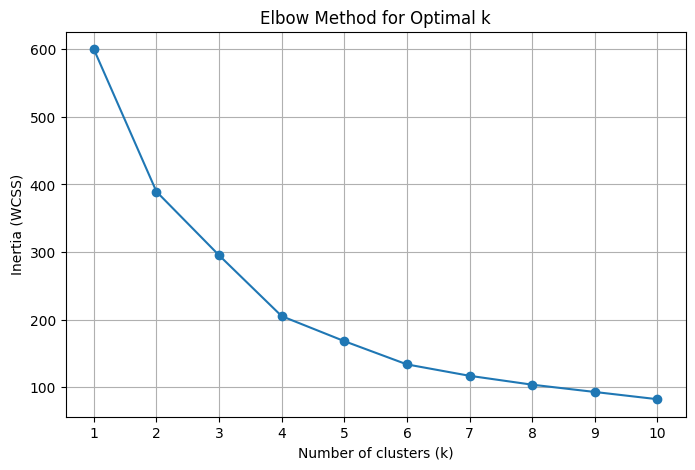

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [35]:
optimal_k=5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

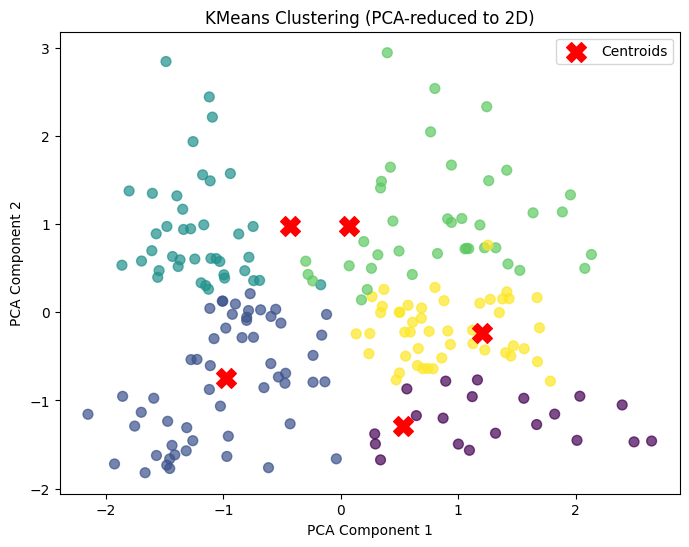

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

DBSCAN Clustering :

In [37]:
from sklearn.cluster import DBSCAN
import numpy as np

for eps in [0.3, 0.5, 0.7, 1.0]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)
        print(f"eps={eps}, min_samples={min_samples} : clusters={n_clusters}, noise={n_noise}")


eps=0.3, min_samples=3 : clusters=12, noise=103
eps=0.3, min_samples=5 : clusters=10, noise=134
eps=0.3, min_samples=10 : clusters=0, noise=200
eps=0.5, min_samples=3 : clusters=8, noise=32
eps=0.5, min_samples=5 : clusters=6, noise=60
eps=0.5, min_samples=10 : clusters=4, noise=114
eps=0.7, min_samples=3 : clusters=2, noise=7
eps=0.7, min_samples=5 : clusters=1, noise=14
eps=0.7, min_samples=10 : clusters=2, noise=43
eps=1.0, min_samples=3 : clusters=1, noise=1
eps=1.0, min_samples=5 : clusters=1, noise=2
eps=1.0, min_samples=10 : clusters=1, noise=5


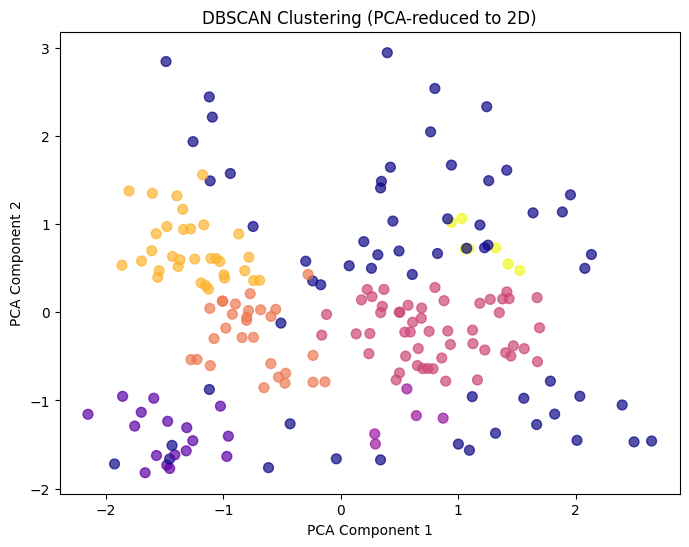

In [42]:



dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='plasma', s=50, alpha=0.7)
plt.title("DBSCAN Clustering (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


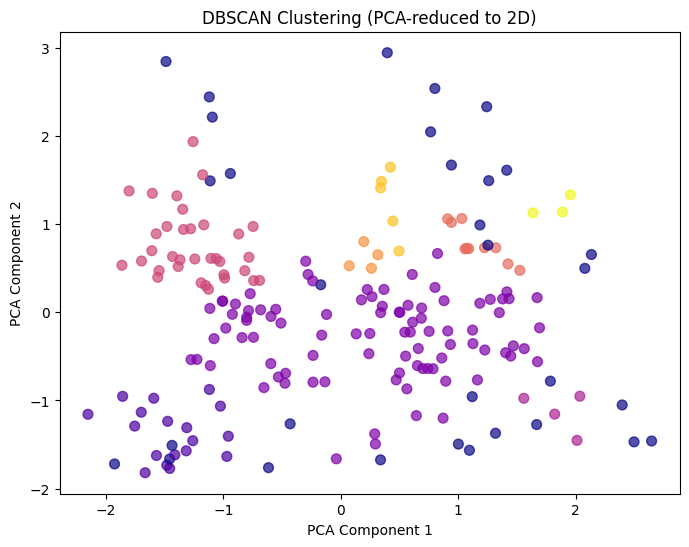

In [43]:

dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='plasma', s=50, alpha=0.7)
plt.title("DBSCAN Clustering (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


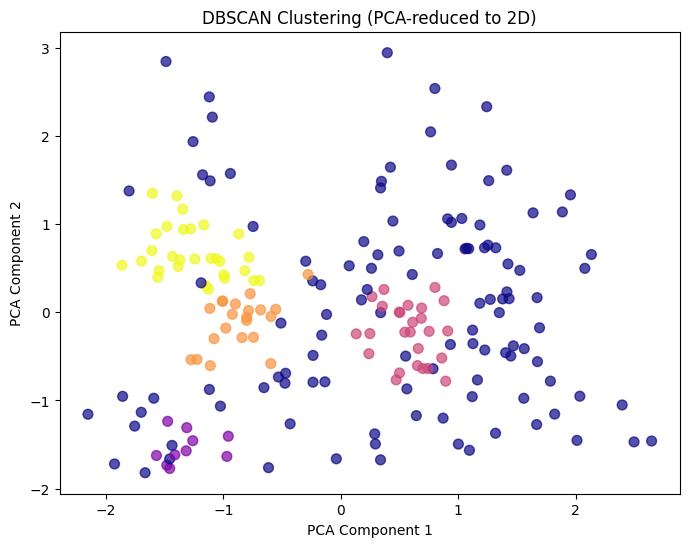

In [44]:

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='plasma', s=50, alpha=0.7)
plt.title("DBSCAN Clustering (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## Analysis and Interpretation


**KMeans vs. DBSCAN:**

*   **KMeans** found 5 clear groups of customers. It's like putting everyone into a box. It's easy to see the average customer in each group.
*   **DBSCAN** found different numbers of groups depending on how we set it up. It also found "outliers" or customers who didn't fit neatly into any group. It's good at finding weirdly shaped groups, but it's harder to get consistent results.

**Which method is better here?**

For understanding mall customers, **KMeans with 5 groups seems more helpful.** It gives us 5 clear types of customers that the mall manager can easily think about and target. DBSCAN is more complex and might be better for finding unusual customer behaviors, but for general segmentation, KMeans is simpler to use and understand.

**What can a mall manager do with this?**

Think of the 5 groups as different types of valuable customers. A mall manager can:

*   **Know their best customers:** Find the group with high income and high spending. Treat them extra special!
*   **Send the right ads:** Send ads about luxury stores to the high-spending group, and ads about sales to a more budget-focused group.
*   **Decide what stores to have:** If there's a big group of young, trendy shoppers, maybe bring in more fashion stores they like.
*   **Make shopping better:** Understand what each group likes and dislikes to make their visit more enjoyable.

In short, this helps the mall understand who their customers are and how to make them happy and spend more.

KMeans and DBSCAN using only two features (e.g., Age and Spending Score):

In [53]:
X_two = df[["Age", "Spending Score (1-100)"]]
X_two_scaled = scaler.fit_transform(X_two)

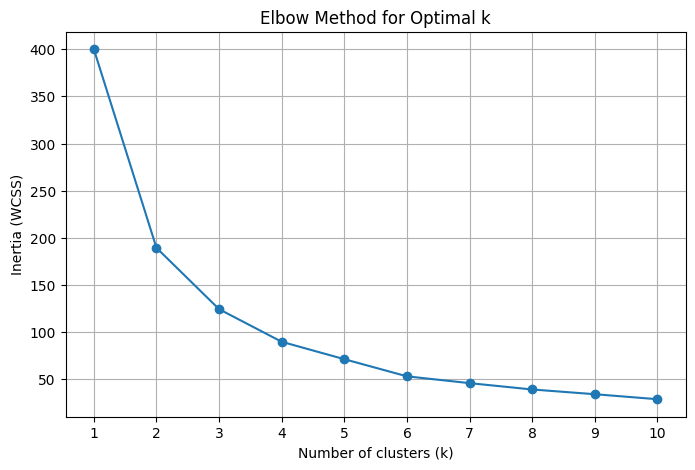

In [54]:
inertias_new = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_two_scaled)
    inertias_new.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias_new, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

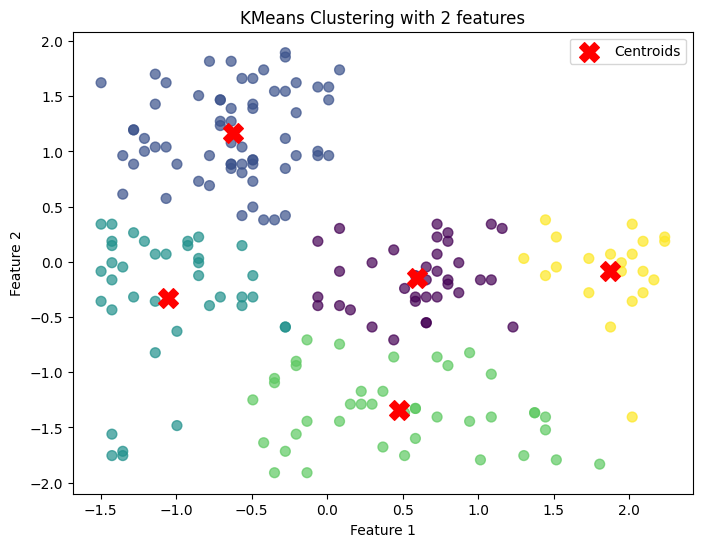

In [57]:
optimal_k=5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_two_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_two_scaled[:,0], X_two_scaled[:,1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering with 2 features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [56]:
for eps in [0.3, 0.5, 0.7, 1.0]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_two_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)
        print(f"eps={eps}, min_samples={min_samples} : clusters={n_clusters}, noise={n_noise}")

eps=0.3, min_samples=3 : clusters=4, noise=8
eps=0.3, min_samples=5 : clusters=6, noise=19
eps=0.3, min_samples=10 : clusters=4, noise=94
eps=0.5, min_samples=3 : clusters=2, noise=0
eps=0.5, min_samples=5 : clusters=2, noise=1
eps=0.5, min_samples=10 : clusters=1, noise=8
eps=0.7, min_samples=3 : clusters=1, noise=0
eps=0.7, min_samples=5 : clusters=1, noise=0
eps=0.7, min_samples=10 : clusters=1, noise=4
eps=1.0, min_samples=3 : clusters=1, noise=0
eps=1.0, min_samples=5 : clusters=1, noise=0
eps=1.0, min_samples=10 : clusters=1, noise=0


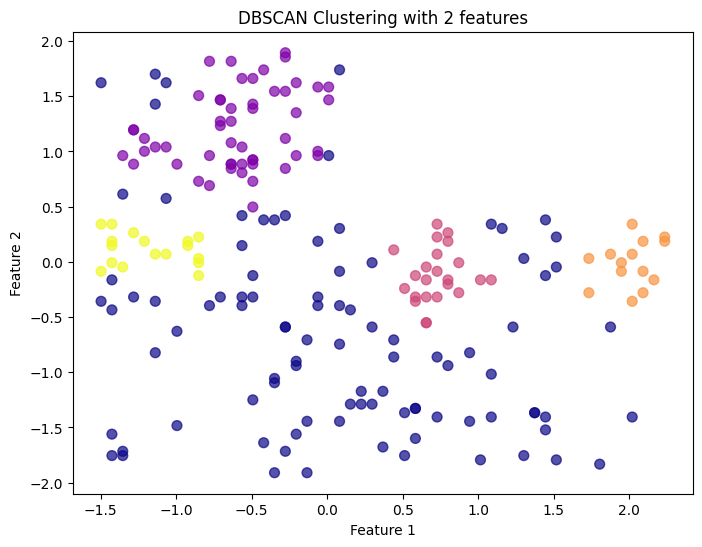

In [58]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_two_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_two_scaled[:,0], X_two_scaled[:,1], c=dbscan_labels, cmap='plasma', s=50, alpha=0.7)
plt.title("DBSCAN Clustering with 2 features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

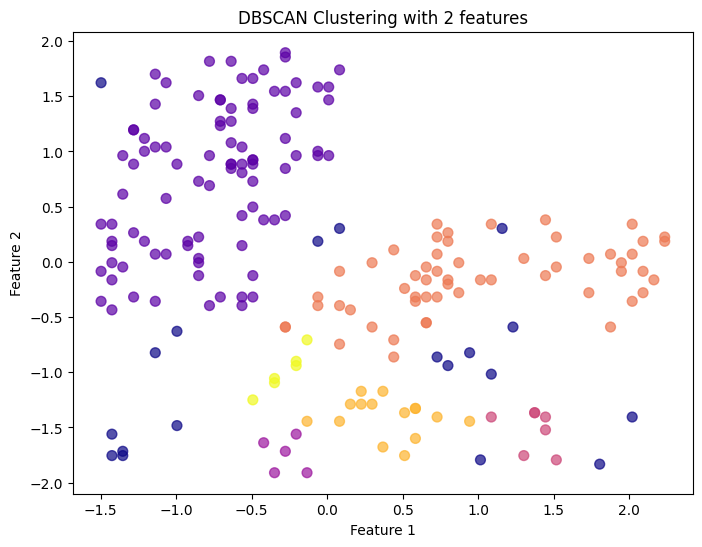

In [59]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_two_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_two_scaled[:,0], X_two_scaled[:,1], c=dbscan_labels, cmap='plasma', s=50, alpha=0.7)
plt.title("DBSCAN Clustering with 2 features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Comparing Clusters: All Features vs. Just Age and Spending Score

When clustering customers, the results can look very different depending on which features we use.

### What the plots show
- With **all the features** (reduced to 2D with PCA), the clusters were visible, but not perfectly separated. We could still guess around 5 groups, though they overlapped a bit.  
- With **only Age and Spending Score**, the clusters became much clearer, forming distinct, well-separated groups.

### Why feature choice matters
- Imagine grouping toys:  
  - If you only look at **color**, you might put red cars and red balls together.  
  - If you also consider **shape**, you’ll separate the cars from the balls.  
- Adding **too many irrelevant features** can blur the boundaries between clusters.  
- Ignoring **important features** can hide meaningful differences.  
- Choosing the **right features** gives the cleanest, most useful clusters.

In this case, **Age and Spending Score** highlighted the customer segments much more clearly than using all the features.
